_Lambda School Data Science_

# Choose appropriate visualizations


Recreate this [example by FiveThirtyEight:](https://fivethirtyeight.com/features/al-gores-new-movie-exposes-the-big-flaw-in-online-movie-ratings/)

![](https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png?w=575)

Using this data:

https://github.com/fivethirtyeight/data/tree/master/inconvenient-sequel

### Stretch goals

Recreate more examples from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

For example:
- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) ([`altair`](https://altair-viz.github.io/gallery/index.html#maps))
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) ([`statsmodels`](https://www.statsmodels.org/stable/index.html))

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# Producing fake data to mimic sample data by FiveThirtyEight
fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], index=range(1,11))
fake

1     38
2      3
3      2
4      1
5      2
6      4
7      6
8      5
9      5
10    33
dtype: int64

In [0]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [0]:
plt.style.use('fivethirtyeight')

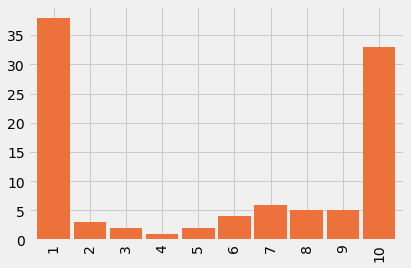

In [0]:
# Can chose colors by color in index of bars in original plot
# color='C1' will turn all bars to color in bar 2
# Width 1 will make it bars to full thinckness like histogram
fake.plot.bar(color='#EC713B', width=0.9); 

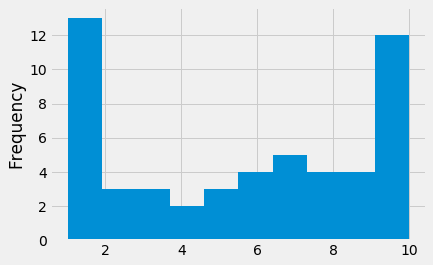

In [0]:
# data to show in histogram or similar plot as above
fake2 = pd.Series([
    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
    2, 2, 2, 
    3, 3, 3,
    4, 4, 
    5, 5, 5,
    6, 6, 6, 6,
    7, 7, 7, 7, 7,
    8, 8, 8, 8,
    9, 9, 9, 9,
    10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

fake2.plot.hist();

In [0]:
fake2.value_counts().sort_index()

1     13
2      3
3      3
4      2
5      3
6      4
7      5
8      4
9      4
10    12
dtype: int64

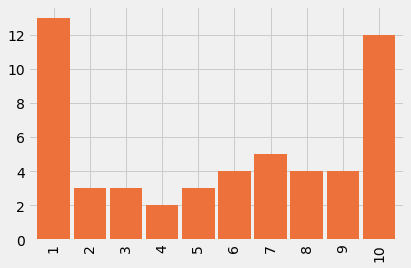

In [0]:
fake2.value_counts().sort_index().plot.bar(color='#EC713B', width=.9);

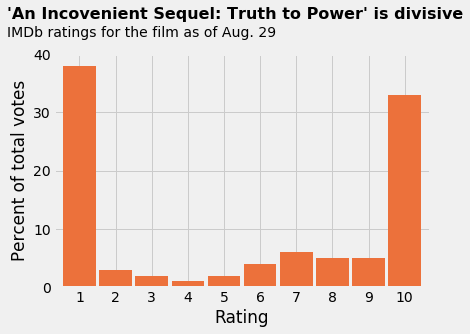

In [0]:
# Further customization first plot
# Object oriented interface (ax) - axis objects to stylize
ax = fake.plot.bar(color='#EC713B', width=0.9)

# Accessing axis to make further customization
ax.tick_params(labelrotation=0)

# Set variety of paramenters at once
ax.set(#title="'An Inconvenient Sequel: Truth to Power' is divisive",
      xlabel='Rating',
      ylabel='Percent of total votes',
      yticks=range(0,50,10)); # Since range is exclusive must go up to 50

# Matplotlib does not support subtitles
# Can exclute title altogether and add arbitrary text

ax.text(x=-2, y=46, s="'An Incovenient Sequel: Truth to Power' is divisive",
       fontsize=16, fontweight='bold')
# Subtitle
ax.text(x=-2, y= 43, s="IMDb ratings for the film as of Aug. 29");

In [0]:
# To remove '...' between columns when too many
pd.options.display.max_columns = None

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')
df.shape

(80053, 27)

In [0]:
width, height = df.shape
width * height

2161431

In [0]:
df.head()

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
0,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
1,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
3,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
4,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [0]:
# transposing rows and columns to see vertically
df.sample(1).T

,3456
timestamp,2017-07-25 03:00:04.685885
respondents,137
category,Aged 45+
link,http://www.imdb.com/title/tt6322922/ratings-age_4
average,3.9
mean,4.7
median,1
1_votes,73
2_votes,2
3_votes,2


In [0]:
# Understanding timestamp variable
# All are unique

df.timestamp.describe()

count                          80053
unique                         80053
top       2017-08-24 17:20:03.810987
freq                               1
Name: timestamp, dtype: object

In [0]:
# May not be properly treated as datetime in pandas
# It does not show first and last date
df.timestamp = pd.to_datetime(df.timestamp)

# Now it does show from Jul 17 to Aug 29
df.timestamp.describe()

count                          80053
unique                         80053
top       2017-07-24 23:00:02.760781
freq                               1
first     2017-07-17 12:28:32.785639
last      2017-08-29 23:10:06.218251
Name: timestamp, dtype: object

In [0]:
# setting timestamp as index will make it easier to sort/select by date
df.set_index('timestamp', inplace=True)

In [0]:
# Over 2600 rows for last day -- so many rows for same day
df['2017-08-29']

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 00:00:02.248882,1682,Males,http://www.imdb.com/title/tt6322922/ratings-male,5.3,5.3,6,671,50,29,12,42,79,107,90,83,519,39.9,3.0,1.7,0.7,2.5,4.7,6.4,5.4,4.9,30.9
2017-08-29 00:00:02.499363,257,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.3,10,53,3,4,4,4,5,14,13,26,131,20.6,1.2,1.6,1.6,1.6,1.9,5.4,5.1,10.1,51.0
2017-08-29 00:00:02.727204,15,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.5,5.3,5,7,0,0,0,1,0,1,0,0,6,46.7,0.0,0.0,0.0,6.7,0.0,6.7,0.0,0.0,40.0
2017-08-29 00:00:03.024270,13,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,5.3,5.9,7,5,0,0,0,1,0,1,0,0,6,38.5,0.0,0.0,0.0,7.7,0.0,7.7,0.0,0.0,46.2
2017-08-29 00:00:03.248207,2,Females under 18,http://www.imdb.com/title/tt6322922/ratings-fe...,1.0,1.0,1,2,0,0,0,0,0,0,0,0,0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-29 00:00:03.441529,450,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.4,6.6,8,117,3,6,7,17,24,35,28,23,190,26.0,0.7,1.3,1.6,3.8,5.3,7.8,6.2,5.1,42.2
2017-08-29 00:00:03.636825,402,Males Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-ma...,6.3,6.5,8,112,3,4,6,15,20,33,25,21,163,27.9,0.7,1.0,1.5,3.7,5.0,8.2,6.2,5.2,40.5
2017-08-29 00:00:03.839446,41,Females Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-fe...,7.1,7.9,10,4,0,2,1,2,2,2,3,2,23,9.8,0.0,4.9,2.4,4.9,4.9,4.9,7.3,4.9,56.1
2017-08-29 00:00:04.030663,771,Aged 30-44,http://www.imdb.com/title/tt6322922/ratings-age_3,5.6,5.6,7,287,21,12,4,21,36,53,38,49,250,37.2,2.7,1.6,0.5,2.7,4.7,6.9,4.9,6.4,32.4


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 80053 entries, 2017-07-17 12:28:32.785639 to 2017-08-29 23:10:06.218251
Data columns (total 26 columns):
respondents    80053 non-null int64
category       80053 non-null object
link           80053 non-null object
average        80053 non-null float64
mean           80053 non-null float64
median         80053 non-null int64
1_votes        80053 non-null int64
2_votes        80053 non-null int64
3_votes        80053 non-null int64
4_votes        80053 non-null int64
5_votes        80053 non-null int64
6_votes        80053 non-null int64
7_votes        80053 non-null int64
8_votes        80053 non-null int64
9_votes        80053 non-null int64
10_votes       80053 non-null int64
1_pct          80053 non-null float64
2_pct          80053 non-null float64
3_pct          80053 non-null float64
4_pct          80053 non-null float64
5_pct          80053 non-null float64
6_pct          80053 non-null float64
7_pct          80053 non-null fl

In [0]:
df.category.value_counts()

US users              4216
Aged 30-44            4216
Females Aged 30-44    4216
IMDb staff            4216
Females               4216
Top 1000 voters       4216
Males under 18        4216
Males                 4216
Males Aged 30-44      4216
Non-US users          4216
Females Aged 45+      4216
Males Aged 18-29      4216
Females Aged 18-29    4216
Males Aged 45+        4216
IMDb users            4216
Aged 45+              4216
Aged 18-29            4216
Aged under 18         4216
Females under 18      4165
Name: category, dtype: int64

In [0]:
# All links start with same code for same title
# So, indeed there's data for only this one movie
df.link.value_counts()

http://www.imdb.com/title/tt6322922/ratings-male_age_3       4216
http://www.imdb.com/title/tt6322922/ratings-age_3            4216
http://www.imdb.com/title/tt6322922/ratings-male_age_4       4216
http://www.imdb.com/title/tt6322922/ratings-female           4216
http://www.imdb.com/title/tt6322922/ratings-top_1000         4216
http://www.imdb.com/title/tt6322922/ratings-international    4216
http://www.imdb.com/title/tt6322922/ratings-female_age_3     4216
http://www.imdb.com/title/tt6322922/ratings-imdb_staff       4216
http://www.imdb.com/title/tt6322922/ratings-usa              4216
http://www.imdb.com/title/tt6322922/ratings-female_age_2     4216
http://www.imdb.com/title/tt6322922/ratings-male_age_2       4216
http://www.imdb.com/title/tt6322922/ratings-male             4216
http://www.imdb.com/title/tt6322922/ratings-female_age_4     4216
http://www.imdb.com/title/tt6322922/ratings-age_2            4216
http://www.imdb.com/title/tt6322922/ratings                  4216
http://www

In [0]:
# Filtering data for only 'IMDb users'
# Notice that under 'link' variable all links are:
# http://www.imdb.com/title/tt6322922/ratings
# Which is what we want -- these kind of ratings
df[df.category=='IMDb users']

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-07-17 12:28:36.697246,678,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.4,5,304,14,8,5,9,10,18,24,30,256,44.8,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.8
2017-07-17 12:34:21.250099,678,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.4,5,304,14,8,5,9,10,18,24,30,256,44.8,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.8
2017-07-17 13:00:06.506688,678,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.4,5,304,14,8,5,9,10,18,24,30,256,44.8,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.8
2017-07-17 14:00:06.727742,679,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,305,14,8,5,9,10,18,24,30,256,44.9,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.7
2017-07-17 15:00:06.055125,679,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,305,14,8,5,9,10,18,24,30,256,44.9,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.7
2017-07-17 16:00:06.023053,679,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,305,14,8,5,9,10,18,24,30,256,44.9,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.7
2017-07-17 17:00:06.142993,679,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,305,14,8,5,9,10,18,24,30,256,44.9,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.7
2017-07-17 18:00:06.510891,680,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,306,14,8,5,9,10,18,24,30,256,45.0,2.1,1.2,0.7,1.3,1.5,2.6,3.5,4.4,37.6
2017-07-17 19:00:06.666467,680,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,306,14,8,5,9,10,18,24,30,256,45.0,2.1,1.2,0.7,1.3,1.5,2.6,3.5,4.4,37.6


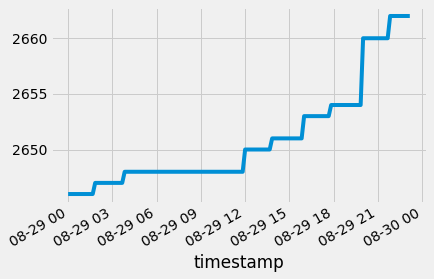

In [0]:
# How respondants change overtime
# Are there new votes on every row per day
# Or do these repeat?
lastday = df['2017-08-29']

# Number of respondents for IMDb users on last day
# Always ascending - monotonic increasing
# Votes represented in this set are commulative
# Meaning all votes for day are on last timestamp
lastday[lastday.category=='IMDb users'].respondents.plot();

In [0]:
# last timestamp
# This is the unique row we want!!!
final = df.tail(1)
final

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [0]:
# We just want the percentage columns
# to redo columns could also do:
# columns = ['{}_pct'.format(k) for k in range(1,11)]
columns = ['1_pct', '2_pct', '3_pct', '4_pct', '5_pct', '6_pct', '7_pct', '8_pct', '9_pct', '10_pct']
data = final[columns].T

data

timestamp,2017-08-29 23:10:06.218251
1_pct,38.4
2_pct,2.6
3_pct,1.4
4_pct,0.9
5_pct,2.1
6_pct,4.1
7_pct,5.8
8_pct,5.5
9_pct,5.5
10_pct,33.7


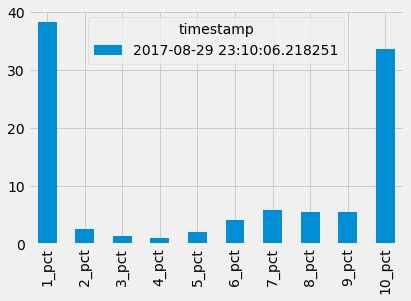

In [0]:
# visualizing final data
data.plot.bar();

In [0]:
# Reindexing data so it shows with proper xtick labels
data.index = range(1, 11)
data

timestamp,2017-08-29 23:10:06.218251
1,38.4
2,2.6
3,1.4
4,0.9
5,2.1
6,4.1
7,5.8
8,5.5
9,5.5
10,33.7


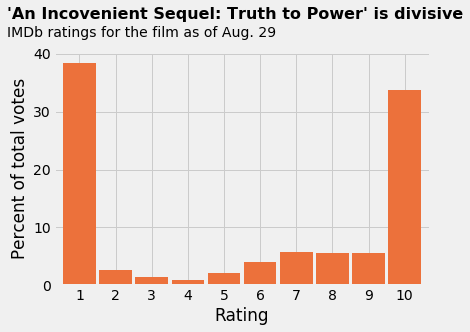

In [0]:
# Further customization first plot
# Object oriented interface (ax) - axis objects to stylize
ax = data.plot.bar(color='#EC713B', width=0.9,
                   legend=False)

# Accessing axis to make further customization
ax.tick_params(labelrotation=0)

# Set variety of paramenters at once
ax.set(#title="'An Inconvenient Sequel: Truth to Power' is divisive",
      xlabel='Rating',
      ylabel='Percent of total votes',
      yticks=range(0,50,10)); # Since range is exclusive must go up to 50

# Matplotlib does not support subtitles
# Can exclute title altogether and add arbitrary text

ax.text(x=-2, y=46, s="'An Incovenient Sequel: Truth to Power' is divisive",
       fontsize=16, fontweight='bold')
# Subtitle
ax.text(x=-2, y= 43, s="IMDb ratings for the film as of Aug. 29");

In [0]:
# If we wanted to accentuate first and last columns only
# with a redish color
colors = ['#333333'] * 10
colors[0] = '#EC713B'
colors[-1] = '#EC713B'

colors

['#EC713B',
 '#333333',
 '#333333',
 '#333333',
 '#333333',
 '#333333',
 '#333333',
 '#333333',
 '#333333',
 '#EC713B']

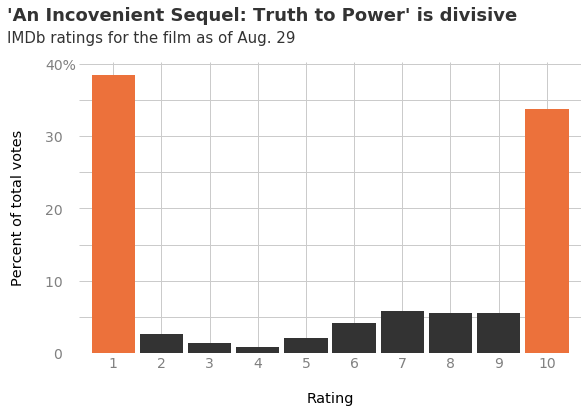

In [0]:
# Here we're changing bar colors to emphasize first & last bars
# Since 'data' above is a DataFrame size (10, 1) we must use a Series
# to pass in list of colors -- Note we use same DataFrame as a Series
fig, ax = plt.subplots(figsize=(8,5), facecolor='w')
ax = data['2017-08-29 23:10:06.218251'].plot.bar(color=colors, width=0.9,
                   legend=False)

# Accessing axis to make further customization:

# Set variety of paramenters at once
ax.set(facecolor='w') # Since range is exclusive must go up to 50

# Matplotlib does not support subtitles
# Can exclute title altogether and add arbitrary text

ax.text(x=-2.2, y=46, s="'An Incovenient Sequel: Truth to Power' is divisive",
       fontsize=18, fontweight='bold', family='sans-serif', color='#333333')
# Subtitle
ax.text(x=-2.2, y= 43, s="IMDb ratings for the film as of Aug. 29",
       fontsize=15, family='sans-serif', color='#333333');


# Rotating x-tick labels
#ax.tick_params(labelrotation=0, color='#A6A6A6')
plt.xticks(rotation=0, color='gray')

ax.set_xlabel('\nRating', weight='medium', fontsize=14.5)
ax.set_ylabel('Percent of total votes\n', weight='medium', fontsize=14.5)

# Changing y-tick labels numbers and color
ax.set_yticklabels(labels=['0   ','', '10   ','', '20   ','', '30   ','', '40%']
                   , color='gray');

# Removing spines all around
for key,spine in ax.spines.items():
    spine.set_visible(False);

## Another plot

In [0]:
first_thru_last = ['2017-07-{}'.format(j) for j in range(17,32)] \
  + ['2017-08-0{}'.format(a) for a in range(1,10)] \
  + ['2017-08-{}'.format(a) for a in range(10,30)]

In [0]:
first_thru_last

['2017-07-17',
 '2017-07-18',
 '2017-07-19',
 '2017-07-20',
 '2017-07-21',
 '2017-07-22',
 '2017-07-23',
 '2017-07-24',
 '2017-07-25',
 '2017-07-26',
 '2017-07-27',
 '2017-07-28',
 '2017-07-29',
 '2017-07-30',
 '2017-07-31',
 '2017-08-01',
 '2017-08-02',
 '2017-08-03',
 '2017-08-04',
 '2017-08-05',
 '2017-08-06',
 '2017-08-07',
 '2017-08-08',
 '2017-08-09',
 '2017-08-10',
 '2017-08-11',
 '2017-08-12',
 '2017-08-13',
 '2017-08-14',
 '2017-08-15',
 '2017-08-16',
 '2017-08-17',
 '2017-08-18',
 '2017-08-19',
 '2017-08-20',
 '2017-08-21',
 '2017-08-22',
 '2017-08-23',
 '2017-08-24',
 '2017-08-25',
 '2017-08-26',
 '2017-08-27',
 '2017-08-28',
 '2017-08-29']

In [0]:
len(first_thru_last)

44

In [0]:
respondent_lst = []
for day in first_thru_last:
    response = (df[day][df[day].category=='IMDb users'].respondents.tail(1)[0]/2662)*100
    respondent_lst.append(response)

In [0]:
len(respondent_lst)

44

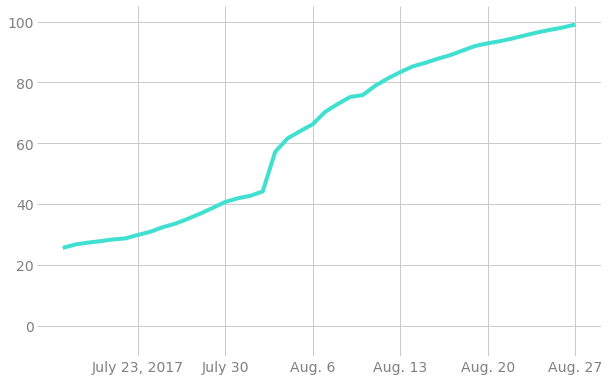

In [0]:
# Setting edges, labels, and around plot color
with plt.rc_context({'axes.edgecolor':'gray', 'xtick.color':'gray', 'ytick.color':'gray', 'figure.facecolor':'white'}):
    fig, ax1 = plt.subplots(figsize=(9,6))
    
    # Plotting based all dates except those after Aug. 27 (exclude last 2 dates)
    ax1 = sns.lineplot(x=first_thru_last[:-2], y=respondent_lst[:-2], color='turquoise')
    
    # Setting y-labels to only these
    ax1.set_yticks([0, 20, 40, 60, 80, 100])
    
    # Setting y axis past 0 & above 100 -- grid line will pass 0 & 100 marker
    plt.ylim(-10,105)
    
    # Setting x-labels based on x-axis values (first_thru_last)
    # Then changing label names
    ax1.set_xticks(['2017-07-23', '2017-07-30', '2017-08-06', '2017-08-13', '2017-08-20', '2017-08-27'])
    ax1.set_xticklabels(['July 23, 2017', 'July 30', 'Aug. 6', 'Aug. 13', 'Aug. 20', 'Aug. 27'])
    
    # White background color
    ax1.set_facecolor('white')
    
    # Removing spine lines all around plot
    for key,spine in ax1.spines.items():
        spine.set_visible(False);